错误使用 eval
未定义函数或变量 'wavread'。



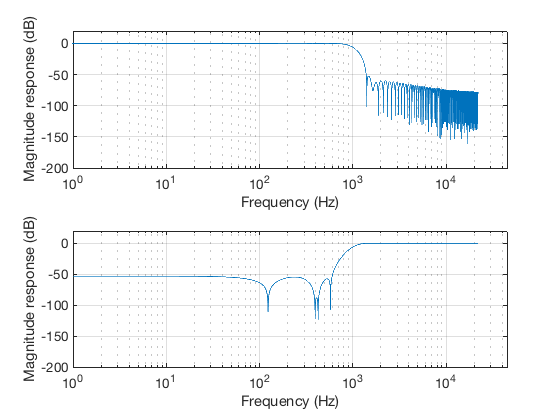

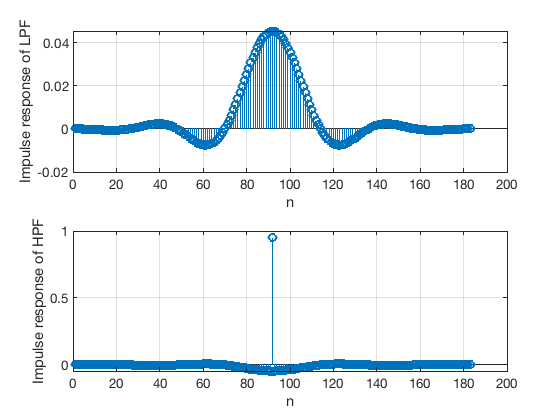

In [1]:
% 数字分频器工作过程
% 包括分频器单位冲激响应及幅频响应
% 数字音频信号通过分频器的输出
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

clear all; close all;

fs = 44100; %采样频率

hL = load('hl.dat');%读取分频器低通系统单位冲激响应
hH = load('hh.dat');%读取分频器高通系统单位冲激响应


figure;%绘图，分频器低通和高通系统单位冲激响应
subplot(2,1,1);stem(hL);grid;xlabel('n');ylabel('Impulse response of LPF');
subplot(2,1,2);stem(hH);grid;xlabel('n');ylabel('Impulse response of HPF');

[HL f]=freqz(hL,1,44100,fs);%计算分频器低通系统频率响应
[HH f]=freqz(hH,1,44100,fs);%计算分频器高通系统频率响应

figure;%绘图，分频器低通和高通系统幅频响应
subplot(2,1,1);semilogx(f,20*log10(abs(HL)));grid
axis([1  45000 -200 20]);
xlabel('Frequency (Hz)');ylabel('Magnitude response (dB)');
subplot(2,1,2);semilogx(f,20*log10(abs(HH)));grid
axis([1  45000 -200 20]);
xlabel('Frequency (Hz)');ylabel('Magnitude response (dB)');

xt = wavread('we.wav');%读取音频信号
x = xt(:,1);%提取其中的一个声道

N=length(x);
f1=[0:N/2]*fs/N;
magX=2*abs(fft(x))/N;magX(1)=magX(1)/2;%分析输入音频信号的频谱

figure;%绘图，输入音频信号的时域和频域波形
subplot(2,1,1);plot(x);
axis([1  N -0.1 0.15]);
xlabel('Number of samples');ylabel('Sample value');grid;
subplot(2,1,2); semilogx(f1,magX(1:N/2+1));
axis([1  N/2+1 0 0.003]);
xlabel('Frequency (Hz)'); ylabel('Amplitude |X(f)| ');grid;

yH=filter(hH,1,x);%音频信号通过分频器高通系统
yL=filter(hL,1,x);%音频信号通过分频器低通系统
magYH=2*abs(fft(yH))/N;magYH(1)=magYH(1)/2;%分析高通系统输出信号的频谱
magYL=2*abs(fft(yL))/N;magYL(1)=magYL(1)/2;%分析低通系统输出信号的频谱

figure;%绘图，低通系统输出的时域和频域波形，高通系统输出的时域和频域波形
subplot(2,2,1); plot(yL);
axis([1  N -0.1 0.15]);
xlabel('Number of samples');ylabel('Sample value');grid;
subplot(2,2,2);semilogx(f1,magYL(1:N/2+1));
axis([1  N/2+1 0 0.003]);
xlabel('Frequency (Hz)'); ylabel('Amplitude |YL(f)| ');grid;
subplot(2,2,3); plot(yH);
axis([1  N -0.1 0.15]);
xlabel('Number of samples');ylabel('Sample value');grid;
subplot(2,2,4);semilogx(f1,magYH(1:N/2+1));
axis([1  N/2+1 0 0.003]);
xlabel('Frequency (Hz)'); ylabel('Amplitude |YH(f)| ');grid;
